In [1]:
import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# your model focuses on during captioning
import matplotlib.pyplot as plt

import collections
import random
import numpy as np
import pandas as pd
import os
import time
import json
from PIL import Image
import requests
from io import BytesIO

In [ ]:
url = "/content/drive/MyDrive/Cap_project/Train_GCC-training.tsv"

cap_data = pd.read_csv(url, sep='\t', header=None, names=['caption', 'image link'])

In [ ]:
cap_data.shape

(3318333, 2)

In [ ]:
cap_data.head()

,caption,image link
0,a very typical bus station,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...
1,sierra looked stunning in this top and this sk...,http://78.media.tumblr.com/3b133294bdc7c7784b7...
2,young confused girl standing in front of a war...,https://media.gettyimages.com/photos/young-con...
3,interior design of modern living room with fir...,https://thumb1.shutterstock.com/display_pic_wi...
4,cybernetic scene isolated on white background .,https://thumb1.shutterstock.com/display_pic_wi...


In [ ]:
#image_link = cap_data['image link']
#captions = cap_data['caption'] 

In [ ]:
#image_path_to_caption = dict(zip(image_link, captions))

In [ ]:
#image_paths = list(image_path_to_caption.keys())

In [ ]:
#random.shuffle(image_paths)

In [ ]:
# Select the first 80000 image_paths from the shuffled set.
#train_image_paths = image_paths[:80000]
#print(len(train_image_paths))

In [ ]:
#pd.Series(train_image_paths).to_csv('/content/drive/MyDrive/Cap_project/train_image_paths.csv', index=False)

In [ ]:
#pd.Series(train_captions).to_csv('/content/drive/MyDrive/Cap_project/train_captions.csv', index=False)

In [ ]:
image_paths = pd.read_csv('/content/drive/MyDrive/Cap_project/train_image_paths.csv')

In [ ]:
image_paths.shape

(80000, 1)

In [ ]:
image_paths = list(image_paths['0'])

In [ ]:
image_paths[:5]

['http://l7.alamy.com/zooms/bc6bffc50096432d87c1bfd6f62abbc5/two-elderly-men-ride-in-the-red-1962-ford-thunderbird-sports-roadster-dba0d2.jpg',
 'http://l7.alamy.com/zooms/62a0460950aa452496233a7df2632e99/family-from-an-outlying-area-in-a-small-boat-in-the-harbor-ilulissat-ger20j.jpg',
 'http://i.dailymail.co.uk/i/pix/2013/06/16/article-2342455-1A57894A000005DC-602_634x913.jpg',
 'https://us.123rf.com/450wm/ktsdesign/ktsdesign1210/ktsdesign121000021/16005226-popcorn-soda-3d-glasses-and-movie-tickets-ready-for-the-film.jpg?ver=6',
 'https://thumb7.shutterstock.com/display_pic_with_logo/1107983/495881911/stock-vector-vector-illustration-of-abstract-vintage-metal-padlock-on-a-white-background-retro-castle-with-a-495881911.jpg']

In [ ]:
captions = pd.read_csv('/content/drive/MyDrive/Cap_project/train_captions.csv')

In [ ]:
captions.shape

(80000, 1)

In [ ]:
captions = list(captions['0'])

In [ ]:
captions[:5]

['elderly men ride in the red classic car .',
 'family from an outlying area in a small boat in the harbor',
 "person : the slender blonde wore her hair out in it 's usual razor straight style and had minimal make - up applied to her complexion",
 'popcorn , soda , 3d glasses and movie tickets , ready for the film .',
 'vector illustration of abstract vintage metal padlock on a white background .']

In [ ]:
#train_captions = [image_path_to_caption[image_path] for image_path in train_image_paths]

In [ ]:
#img_cap_dict = {}

In [ ]:
#def download_images(url, index):
    #dir = '/content/drive/MyDrive/Cap_project/Train_images/'
    #try:
        #response = requests.get(url, timeout=5)
        #image = Image.open(BytesIO(response.content))
        #image = image.save(f'{dir}image{index}.jpg')
        #img_cap_dict[f'image{index}.jpg'] = t_captions[index]
    #except Exception as e:
        pass

In [ ]:
d = "/content/drive/MyDrive/Cap_project/Train_images"

In [ ]:
np.array(os.listdir(d)).shape

(86294,)

In [ ]:
#import imghdr
#if imghdr.what(f'{d}/{img}') == "jpeg"
#(img, t_captions[int(img.split('.')[0][5:])])

In [ ]:
#img_cap = [(img, t_captions[int(img.split('.')[0][5:])]) for img in sorted(os.listdir(d))[1:] if imghdr.what(f'{d}/{img}') == "jpeg"]

In [ ]:
with open("/content/drive/MyDrive/Cap_project/img_cap.json") as outfile:
    img_cap = json.load(outfile)

In [ ]:
len(img_cap)

43147

In [ ]:
#with open("/content/drive/MyDrive/Cap_project/img_cap.json", "w") as write_file:
    #json.dump(img_cap, write_file)

In [ ]:
#count = 0
#for i,path in enumerate(img_paths[40015:50016]):
    #download_images(path, i+40015)
    #print(f'image index tried downloading: {count}')
    #count += 1

#Visualize some pictures and their captions

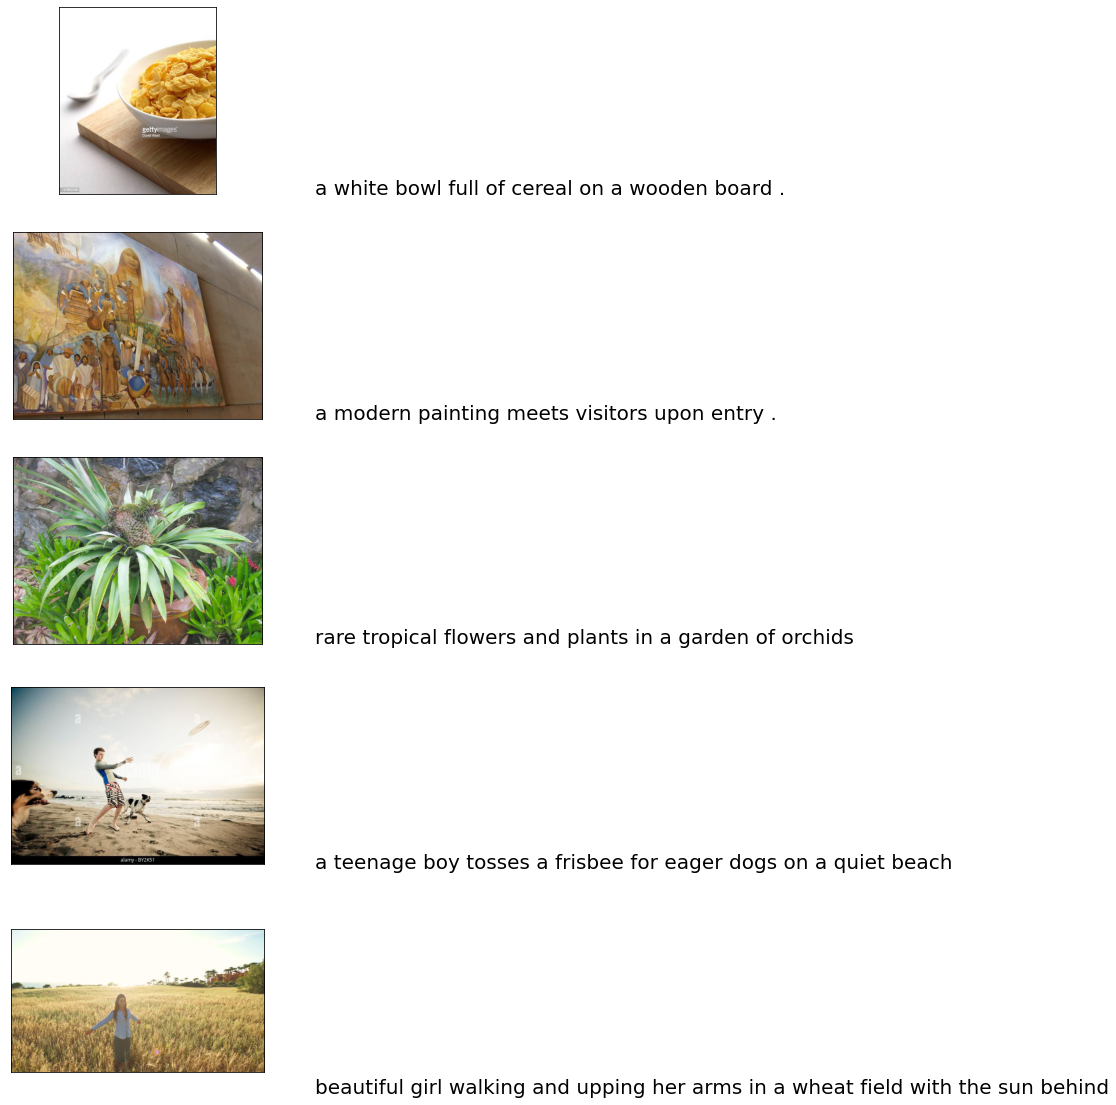

In [ ]:
npic = 5
npix = 224
target_size = (npix,npix,3)
count = 1

fig = plt.figure(figsize=(10,20))
for img in list(img_cap.keys())[10:15]:
   filename = f"{d}/{img}"
   caption = img_cap[img]
   image_load = plt.imread(filename)
   
   ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
   ax.imshow(image_load)
   count += 1

   ax = fig.add_subplot(npic,2,count)
   plt.axis('off')
   ax.plot()
   ax.set_xlim(0,1)
   ax.set_ylim(0,len(captions))
   ax.text(0,25,caption,fontsize=20)
   count += 1
plt.show()

In [ ]:
vocabulary = []
for txt in list(img_cap.values()):
   vocabulary.extend(txt.split())
print('Vocabulary Size: %d' % len(set(vocabulary)))

Vocabulary Size: 15028


In [ ]:
"""
def remove_punctuation(text_original):
   text_no_punctuation = text_original.translate(string.punctuation)
   return(text_no_punctuation)

def remove_single_character(text):
   text_len_more_than1 = ""
   for word in text.split():
       if len(word) > 1:
           text_len_more_than1 += " " + word
   return(text_len_more_than1)

def remove_numeric(text):
   text_no_numeric = ""
   for word in text.split():
       isalpha = word.isalpha()
       if isalpha:
           text_no_numeric += " " + word
   return(text_no_numeric)

def text_clean(text_original):
   text = remove_punctuation(text_original)
   text = remove_single_character(text)
   text = remove_numeric(text)
   return(text)

for i, caption in enumerate(list(img_cap.values())):
   newcaption = text_clean(caption)
   data["caption"].iloc[i] = newcaption
"""

In [ ]:
img_name_vector = [f"{d}/{img}" for img in list(img_cap.keys())]

In [ ]:
img_name_vector[43140:]

['/content/drive/MyDrive/Cap_project/Train_images/image9993.jpg',
 '/content/drive/MyDrive/Cap_project/Train_images/image9994.jpg',
 '/content/drive/MyDrive/Cap_project/Train_images/image9995.jpg',
 '/content/drive/MyDrive/Cap_project/Train_images/image9996.jpg',
 '/content/drive/MyDrive/Cap_project/Train_images/image9997.jpg',
 '/content/drive/MyDrive/Cap_project/Train_images/image9998.jpg',
 '/content/drive/MyDrive/Cap_project/Train_images/image9999.jpg']

In [ ]:
train_cap = [f"<start> {cap} <end>" for cap in list(img_cap.values())]

In [ ]:
train_cap[43140:]

['<start> high speed train emerging from a tunnel and passing the camera <end>',
 '<start> the series : person is in theaters and i pulled some of my favorite party ideas together in honor of the second movie ! <end>',
 '<start> baseball player reacts after striking out to end the seventh inning against sports team . <end>',
 '<start> in her prime : person , now cited as a country music great , performs in an undated picture <end>',
 '<start> card with a cup of hot coffee . <end>',
 '<start> person and the queens on stage <end>',
 '<start> illustration of a girl wearing hat on a white background <end>']

# Feature extraction model definition

## Preprocess the images using InceptionV3

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 1s 0us/step


### Caching the features extracted from InceptionV3

In [ ]:
!pip install tdqm

  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1323 sha256=9a8f7a1f6d735e2dd12b9192b10bc94c7fcdde48b53b466337902e88056b25e6
  Stored in directory: /root/.cache/pip/wheels/c6/f0/d9/9fa5ff78c0f9d5a0a427bbbb4893c283520ddfccb885ea2205
Successfully built tdqm


In [ ]:
from tqdm import tqdm

In [ ]:
# Get unique images
encode_train = sorted(set(img_name_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

### Caching the features extracted from InceptionV3

In [ ]:
for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())

100%|██████████| 2697/2697 [1:03:29<00:00,  1.41s/it]


# Preprocess and tokenize captions

In [ ]:
# Find the maximum length of any caption in the dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
# Choose the top 5000 words from the vocabulary
top_k = 15000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(train_cap)

In [ ]:
tokenizer.num_words

15000

In [ ]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [ ]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_cap)

In [ ]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [ ]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

# Split data into training and validation sets 

In [ ]:
random.seed(30)

In [ ]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 90-10 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.9)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])

In [ ]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(38832, 38832, 4315, 4315)

# Create a tf.data dataset for training

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
num_steps = len(img_name_train) // BATCH_SIZE

In [ ]:
# Load the numpy files
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1,
                      item2: tf.numpy_function(map_func, [item1, item2],
                                               [tf.float32, tf.int32]),
                      num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Image Captioning Model Definition (Transformer)

In [ ]:
import logging
import pathlib
import re
import string
import sys
import time

#import tensorflow_text as text

# Positional Encoding

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [ ]:
def positional_encoding_1d(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
def positional_encoding_2d(row,col,d_model):
    assert d_model % 2 == 0
    row_pos = np.repeat(np.arange(row),col)[:,np.newaxis]
    col_pos = np.repeat(np.expand_dims(np.arange(col),0),row,axis=0).reshape(-1,1)

    angle_rads_row = get_angles(row_pos,np.arange(d_model//2)[np.newaxis,:],d_model//2)
    angle_rads_col = get_angles(col_pos,np.arange(d_model//2)[np.newaxis,:],d_model//2)

    angle_rads_row[:, 0::2] = np.sin(angle_rads_row[:, 0::2])
    angle_rads_row[:, 1::2] = np.cos(angle_rads_row[:, 1::2])
    angle_rads_col[:, 0::2] = np.sin(angle_rads_col[:, 0::2])
    angle_rads_col[:, 1::2] = np.cos(angle_rads_col[:, 1::2])
    pos_encoding = np.concatenate([angle_rads_row,angle_rads_col],axis=1)[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

# Masking

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead)
    but it must be broadcastable for addition.

    Args:
        q: query shape == (..., seq_len_q, depth)
        k: key shape == (..., seq_len_k, depth)
        v: value shape == (..., seq_len_v, depth_v)
        mask: Float tensor with shape broadcastable
          to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
        output, attention_weights
    """

    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

# Multi-head attention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention,
                                    (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights

# Point wise feed forward network

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

# Encoder and decoder

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)

        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, row_size,col_size,rate=0.1):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Dense(self.d_model,activation='relu')
        self.pos_encoding = positional_encoding_2d(row_size,col_size,self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask=None):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)  # (batch_size, input_seq_len(H*W), d_model)
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x  # (batch_size, input_seq_len, d_model)

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers,d_model,num_heads,dff, target_vocab_size, maximum_position_encoding,   rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding_1d(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                         for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training,look_ahead_mask=None, padding_mask=None):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                            look_ahead_mask, padding_mask)
         
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        return x, attention_weights

# Transformer

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff,row_size,col_size,
                target_vocab_size,max_pos_encoding, rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff,row_size,col_size, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                          target_vocab_size,max_pos_encoding, rate)
        
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training,look_ahead_mask=None,dec_padding_mask=None,enc_padding_mask=None   ):
        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model      )
        dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
        return final_output, attention_weights

# Set hyperparameters

In [ ]:
num_layer = 4
d_model = 512
dff = 2048
num_heads = 8
row_size = 8
col_size = 8
target_vocab_size = top_k + 1
dropout_rate = 0.1 

# Optimizer

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

# Loss and metrics

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
#def accuracy_function(real, pred):
    #accuracies = tf.equal(real, tf.argmax(pred, axis=2))

    #mask = tf.math.logical_not(tf.math.equal(real, 0))
    #accuracies = tf.math.logical_and(mask, accuracies)

    #accuracies = tf.cast(accuracies, dtype=tf.float32)
    #mask = tf.cast(mask, dtype=tf.float32)
    #return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

# Training and checkpointing

In [ ]:
transformer = Transformer(num_layer,d_model,num_heads,dff,row_size,col_size,target_vocab_size,
                          max_pos_encoding=target_vocab_size,rate=dropout_rate)

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Cap_project/checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

# Model Training

In [ ]:
def create_masks_decoder(tar):
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    return combined_mask

In [ ]:
@tf.function
def train_step(img_tensor, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    dec_mask = create_masks_decoder(tar_inp)
    with tf.GradientTape() as tape:
        predictions, _ = transformer(img_tensor, tar_inp,True, dec_mask)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)   
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    train_loss(loss)
    train_accuracy(tar_real, predictions)

In [ ]:
for epoch in range(11):
    start = time.time()
    train_loss.reset_states()
    train_accuracy.reset_states()
    for (batch, (img_tensor, tar)) in enumerate(dataset):
        train_step(img_tensor, tar)
        if batch % 50 == 0:
            print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
            epoch + 1, batch, train_loss.result(), train_accuracy.result()))

    if (epoch + 1) % 2 == 0:
        ckpt_save_path = ckpt_manager.save()
        print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

    print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1,
                                               train_loss.result(),
                                               train_accuracy.result()))
    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 9.6345 Accuracy 0.0000
Epoch 1 Batch 50 Loss 9.3560 Accuracy 0.0128
Epoch 1 Batch 100 Loss 9.0488 Accuracy 0.0168
Epoch 1 Batch 150 Loss 8.7923 Accuracy 0.0181
Epoch 1 Batch 200 Loss 8.5157 Accuracy 0.0196
Epoch 1 Batch 250 Loss 8.2306 Accuracy 0.0215
Epoch 1 Batch 300 Loss 7.9649 Accuracy 0.0233
Epoch 1 Batch 350 Loss 7.7328 Accuracy 0.0248
Epoch 1 Batch 400 Loss 7.5430 Accuracy 0.0263
Epoch 1 Batch 450 Loss 7.3809 Accuracy 0.0277
Epoch 1 Batch 500 Loss 7.2403 Accuracy 0.0289
Epoch 1 Batch 550 Loss 7.1143 Accuracy 0.0301
Epoch 1 Batch 600 Loss 7.0029 Accuracy 0.0312
Epoch 1 Loss 6.9897 Accuracy 0.0314
Time taken for 1 epoch: 3528.859676361084 secs

Epoch 2 Batch 0 Loss 5.8301 Accuracy 0.0449
Epoch 2 Batch 50 Loss 5.6782 Accuracy 0.0448
Epoch 2 Batch 100 Loss 5.6339 Accuracy 0.0452
Epoch 2 Batch 150 Loss 5.5842 Accuracy 0.0458
Epoch 2 Batch 200 Loss 5.5517 Accuracy 0.0464
Epoch 2 Batch 250 Loss 5.5266 Accuracy 0.0467
Epoch 2 Batch 300 Loss 5.5035 Accuracy 0.0471
Ep

In [ ]:
def evaluate(image):
    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))
    start_token = tokenizer.word_index['<start>']
    end_token = tokenizer.word_index['<end>']
    decoder_input = [start_token]
    output = tf.expand_dims(decoder_input, 0) #tokens
    result = [] #word list

    for i in range(100):
        dec_mask = create_masks_decoder(output)
        predictions, attention_weights = transformer(img_tensor_val,output,False,dec_mask)
        predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        if predicted_id == end_token:
            return result,tf.squeeze(output, axis=0), attention_weights
        result.append(tokenizer.index_word[int(predicted_id)])
        output = tf.concat([output, predicted_id], axis=-1)

    return result,tf.squeeze(output, axis=0), attention_weights